# **Data Visualization**

# Objectives
Explore and visualize restaurant data across 31 European cities to uncover patterns and insights related to cuisine, ratings, rankings, pricing, and customer engagement. Through interactive visualizations and descriptive analysis, we aim to:

- Understand the distribution and popularity of different cuisine styles across cities.

- Analyze the relationship between restaurant rankings, ratings, and number of reviews.

- Examine how price ranges correlate with ratings and cuisine and city.

These insights can be useful for tourists, restaurant owners, and analysts seeking to better understand the European restaurant landscape.

# Input
* The input can be found [here](../data_set/processed/TA_restaurants_cleaned.csv)
* This is a csv file contained the cleaned data outputted by the ETL process.

# Outputs

- All the visualizations have been saved as PNG files and are stored in a designated folder for easy access and reference, which can be found [here](../Images).

---

# Change working directory
Change the working directory from its current folder to its parent folder as the notebooks will be stored in a subfolder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\amron\\Desktop\\euro-dine-insights\\jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\amron\\Desktop\\euro-dine-insights'

Changing path directory to the dataset

In [4]:
#path directory
raw_data_dir = os.path.join(current_dir, 'data_set/raw') 

#path directory
processed_data_dir = os.path.join(current_dir, 'data_set/processed') 


---

# Import packages

In [5]:
import pandas as pd # Import pandas
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn
import plotly.express as px # Import plotly
sns.set_style('whitegrid') # Set style for visuals

---

# Load the cleaned dataset

In [6]:
#load the cleaned dataset
df = pd.read_csv(os.path.join(processed_data_dir, 'TA_restaurants_cleaned.csv'))

#display first 5 rows of data
df.head() 

,Name,City,Cuisine,Ranking,Rating,Price_Range,Number_of_Reviews,Cuisine_Counts,Country_Name
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136,3,Netherlands
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812,4,Netherlands
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567,6,Netherlands
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564,7,Netherlands
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316,6,Netherlands


---

# Price Perception
Investigates whether restaurants with higher prices are more likely to achieve better ratings. The analysis will use two key variables: Price Range (grouped into low, medium, and high) and Rating (1–5 scale).

In [7]:
#copy the dataframe to avoid any changes to the original dataframe
df_price = df.copy()

In [8]:
#how many restaurants are in each price range
df_price['Price_Range'].value_counts()

Price_Range
$$ - $$$    52507
$           17639
$$$$         4075
Name: count, dtype: int64

### Insights:
- The dataset is highly imbalanced across price categories, most restaurants fall into the medium price range around (68%), followed by low priced around (23%), while high priced restaurants are a small minority around (5%).

- Comparing raw counts may bias the results toward medium priced restaurants.

- To gain deeper insights, it will be important to examine the rating distribution within each price range.

In [9]:
#check the categories in the Price_Range column
df_price['Price_Range'].unique()

array(['$$ - $$$', '$$$$', '$'], dtype=object)

In [10]:
#change the Price_Range column into three simplified categories: $$$$ to high, $$ - $$$ to medium, $ to low
df_price['Price_Range'] = df_price['Price_Range'].replace({'$$$$': 'high', '$$ - $$$': 'medium', '$': 'low'})
#display the first row to confirm changes
df_price.head(1)

,Name,City,Cuisine,Ranking,Rating,Price_Range,Number_of_Reviews,Cuisine_Counts,Country_Name
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,medium,136,3,Netherlands


In [11]:
#change the Rating column into three simplified categories: Excellent (4-5), Average (3.0–3.9), Poor (1-2.9)
def categorize_rating(rating):
    if rating >= 4.0:
        return 'Excellent'
    elif 3.0 <= rating < 4.0:
        return 'Average'
    else:
        return 'Poor'  
df_price['Rating_Category'] = df_price['Rating'].apply(categorize_rating)
#display the first row to confirm changes
df_price.head(1)

,Name,City,Cuisine,Ranking,Rating,Price_Range,Number_of_Reviews,Cuisine_Counts,Country_Name,Rating_Category
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,medium,136,3,Netherlands,Excellent


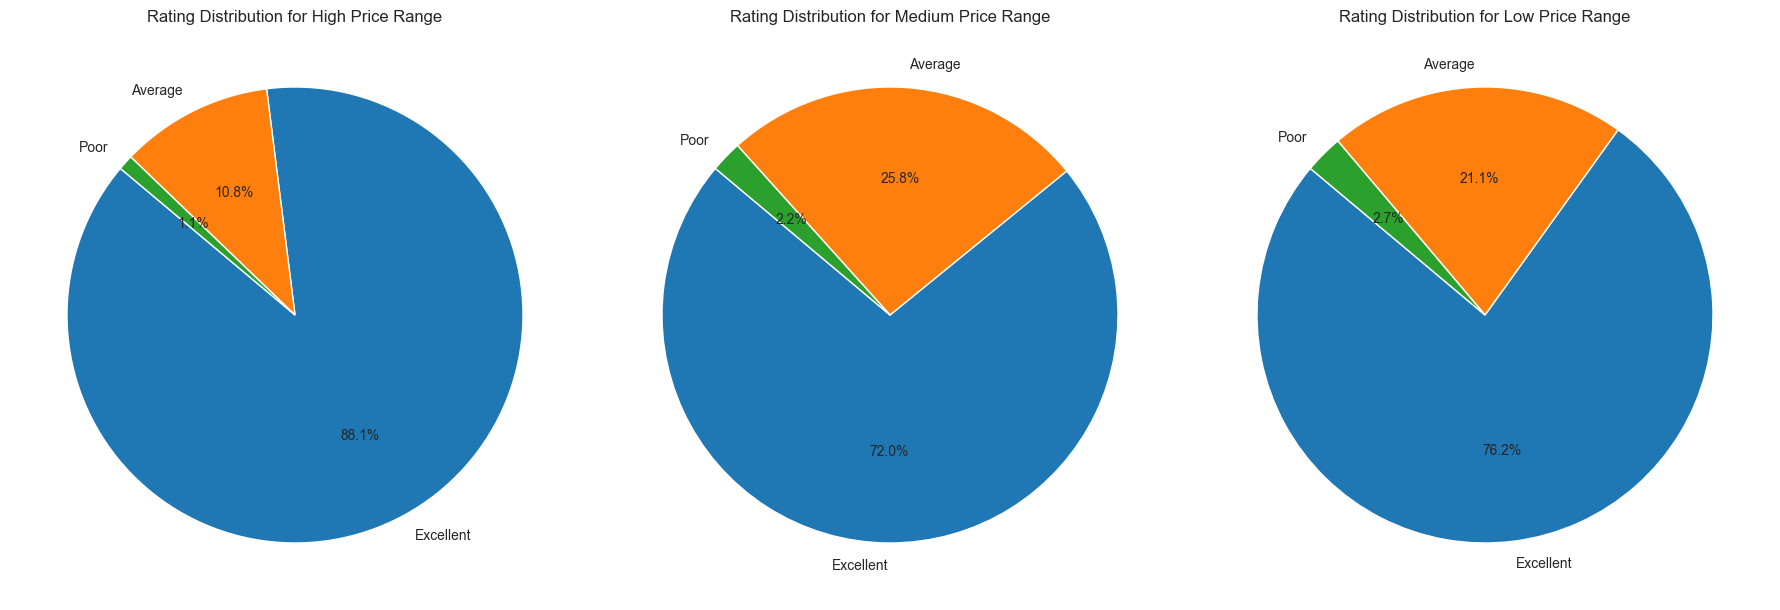

In [12]:
#subplots pie chart showing the proportion of rating categories for each price range
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
price_ranges = ['high', 'medium', 'low']
for ax, price in zip(axes, price_ranges):
    data = df_price[df_price['Price_Range'] == price]['Rating_Category'].value_counts()
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Rating Distribution for {price.capitalize()} Price Range')
plt.tight_layout()
plt.show()


### Key Insights
* High Price Range:

    * 88.1% of high-priced restaurants are rated as Excellent, with only 10.8% rated as Average and a 1.1% rated as Poor.

    * This indicates a strong positive correlation between higher prices and excellent ratings.

* Medium Price Range:

    * The proportion of Excellent ratings drops to 72.0%, while Average ratings increase to 25.8%, and Poor ratings to 2.2%.

    * This shows a more balanced distribution, but still skewed toward excellent ratings.

* Low Price Range:

   * Excellent ratings account for 76.2%, slightly higher than the medium price range but lower than the high range.

### Conclusion
The data reveals a clear relationship between price range and customer ratings. High priced restaurants receive excellent ratings, supporting the price perception hypothesis. customers may associate higher prices with better quality, services and ambiance.

---